In [1]:
import pandas as pd
data = pd.read_csv('CaseCompetitionData2021.csv')

pd.options.display.max_columns= None

In [2]:
del data['post_purchase_satisfaction']

In [3]:
def getI(df_object, value):
    check = df_object.isin([value])
    seriesObj = check.any()
    listofIs =[]
    for col in list(seriesObj[seriesObj == True].index):
        rows = list(check[col][check[col] == True].index)
        for row in rows:
            listofIs.append((row, col))
    return listofIs

Na_values = getI(data,'?')
na_values = [Na_values[i][0] for i in range(len(Na_values))]

data = data.drop(index=na_values)

data

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,vehicle_warranty_used,subsequent_purchases
0,81690,DODGE,CHARGER,2012,15001 - 20000,1,1,21 - 30,40001 - 60000,U,0,8,0,1
1,109994,FORD,F150,2007,15001 - 20000,0,0,51 - 60,0 - 20000,F,1,19,0,0
2,11399,BMW,328,2010,25001 - 30000,1,1,41 - 50,60001 - 80000,F,1,21,0,0
3,214156,LEXUS,GS 300,2003,10001 - 15000,0,1,21 - 30,20001 - 40000,M,0,8,0,0
4,36685,CHEVROLET,CRUZE,2012,15001 - 20000,1,1,31 - 40,120001 - 140000,M,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355866,332409,TOYOTA,RAV4,2011,20001 - 25000,1,1,51 - 60,40001 - 60000,F,1,3,0,0
355868,324762,TOYOTA,HIGHLANDER,2013,35001 - 40000,0,1,41 - 50,100001 - 120000,M,0,14,0,4
355869,195314,JEEP,LIBERTY,2010,15001 - 20000,0,1,21 - 30,20001 - 40000,F,0,13,0,0
355871,207386,KIA,SORENTO,2012,15001 - 20000,1,1,61 - 70,20001 - 40000,F,1,9,0,1


In [4]:
data.loc[data['subsequent_purchases'] > 0, ['subsequent_purchases']] = 1

In [5]:
indexnames = data.loc[data['subsequent_purchases']==0].index

In [ ]:
#data = data.drop(indexnames)

#data

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
def cat_summaries(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    if x == None:
        column = y
    else:
        column = x
    series = dataframe[column]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count            304950
unique               11
top       20001 - 40000
freq              79301
Name: customer_income, dtype: object
mode:  0    20001 - 40000
dtype: object
20001 - 40000      79301
40001 - 60000      75921
60001 - 80000      41999
0 - 20000          32038
80001 - 100000     29219
100001 - 120000    15596
200001+            10747
140001 - 160000     7452
120001 - 140000     7369
160001 - 180000     3682
180001 - 200000     1626
Name: customer_income, dtype: int64


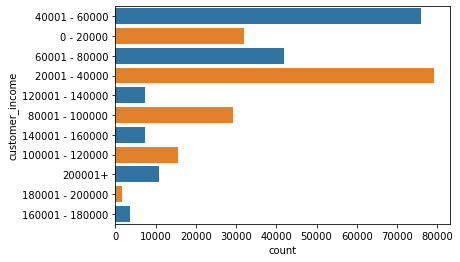

In [8]:
c_palette = ['tab:blue', 'tab:orange']

cat_summaries(data,y='customer_income',palette=c_palette)

count            304950
unique               11
top       20001 - 40000
freq              79301
Name: customer_income, dtype: object
mode:  0    20001 - 40000
dtype: object
20001 - 40000      79301
40001 - 60000      75921
60001 - 80000      41999
0 - 20000          32038
80001 - 100000     29219
100001 - 120000    15596
200001+            10747
140001 - 160000     7452
120001 - 140000     7369
160001 - 180000     3682
180001 - 200000     1626
Name: customer_income, dtype: int64


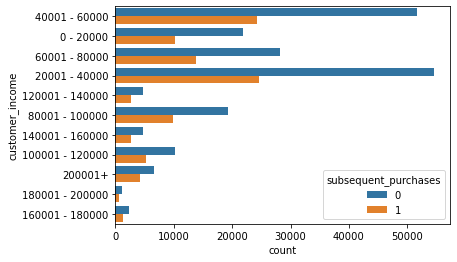

In [9]:
cat_summaries(data,y='customer_income',hue='subsequent_purchases',palette=c_palette)

count     304950
unique         3
top            M
freq      156276
Name: customer_gender, dtype: object
mode:  0    M
dtype: object
M    156276
F    118103
U     30571
Name: customer_gender, dtype: int64


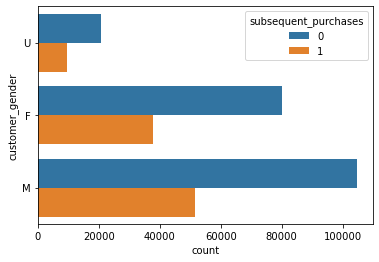

In [11]:
cat_summaries(data,y='customer_gender',hue='subsequent_purchases',palette=c_palette)

count            304950
unique               18
top       15001 - 20000
freq             101822
Name: purchase_price, dtype: object
mode:  0    15001 - 20000
dtype: object
15001 - 20000    101822
10001 - 15000     89044
20001 - 25000     56271
25001 - 30000     26918
30001 - 35000     12449
5001 - 10000       7725
35001 - 40000      5903
40001 - 45000      2435
45001 - 50000      1230
50001 - 55000       528
55001 - 60000       281
60001 - 65000       154
65001 - 70000       100
70001 - 75000        45
75001 - 80000        26
85001 - 90000        11
80001 - 85000         7
90001 - 95000         1
Name: purchase_price, dtype: int64


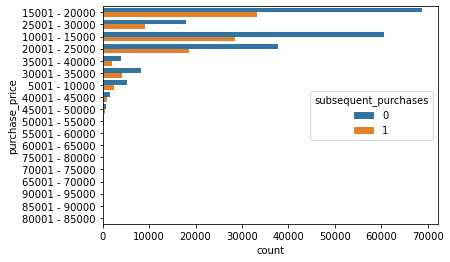

In [12]:
cat_summaries(data,y='purchase_price',hue='subsequent_purchases',palette=c_palette)

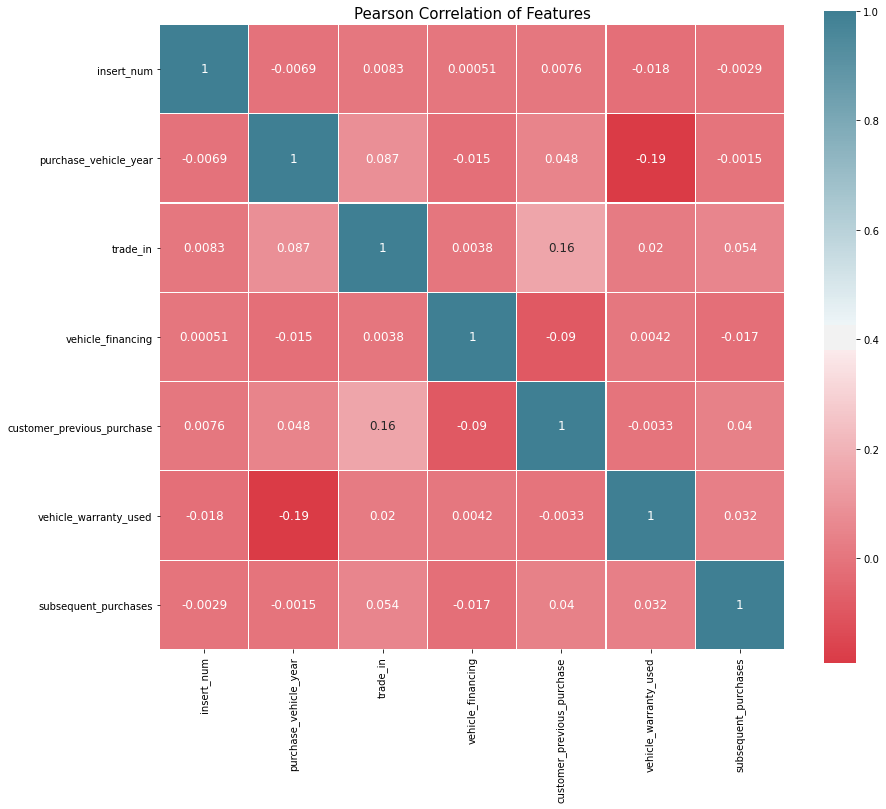

In [13]:
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(data.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

In [9]:
pd.crosstab(data.purchase_price,data.subsequent_purchases)

subsequent_purchases,0,1
purchase_price,,
10001 - 15000,60649,28395
15001 - 20000,68681,33141
20001 - 25000,37794,18477
25001 - 30000,17914,9004
30001 - 35000,8334,4115
35001 - 40000,3898,2005
40001 - 45000,1561,874
45001 - 50000,769,461
50001 - 55000,332,196
